In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'Dataset/UrbanSound8K/audio/12647-3-2-0.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 7EB9-CBD9

 Directory of C:\Users\hp\MLProjects

12/11/2021  03:44 PM    <DIR>          .
12/11/2021  03:44 PM    <DIR>          ..
12/01/2021  03:38 PM    <DIR>          .ipynb_checkpoints
12/01/2021  03:04 PM    <DIR>          Dataset
12/01/2021  03:37 PM         1,966,270 exploring_mfccs.ipynb
12/08/2021  08:12 PM    <DIR>          HTML UI
12/02/2021  07:14 PM    <DIR>          SavedModels
12/11/2021  03:44 PM         1,534,627 Sound_classification.ipynb
12/01/2021  03:40 PM               588 Untitled.ipynb
               3 File(s)      3,501,485 bytes
               6 Dir(s)  214,520,172,544 bytes free


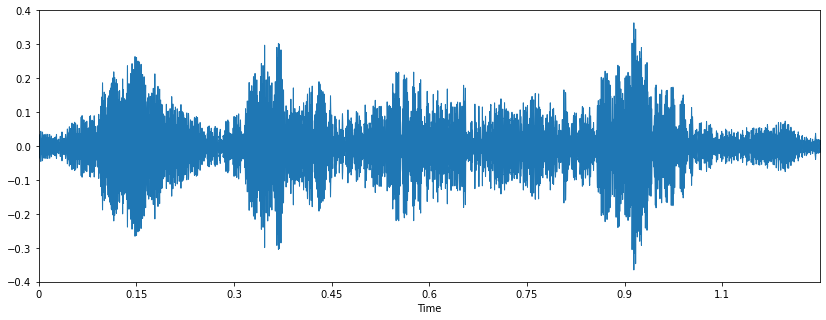

In [5]:
# Dog sound plotting
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_data = wav.read(filename)

In [7]:
# actual sample rate of sound wave
wave_sample_rate

44100

In [8]:
# librosa converts sample rate to 22050
# sound is getting mono
sample_rate

22050

In [9]:
wave_data

array([1159, 1098, 1044, ...,  508,  545,  554], dtype=int16)

In [10]:
# in librosa dat is getting normalized
data

array([0.02567716, 0.03485705, 0.02669417, ..., 0.01482471, 0.01504853,
       0.01732902], dtype=float32)

In [11]:
import pandas as pd

In [12]:
# loading metadata 

metadata = pd.read_csv('Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
# check whether the dataset is imbalanced

metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Extracting Features

In [14]:
# using mfccs

mfccs = librosa.feature.mfcc(data, sr = sample_rate, n_mfcc =13)

In [15]:
mfccs

array([[-3.89236389e+02, -3.88177002e+02, -3.83867493e+02,
        -3.64877594e+02, -3.31142059e+02, -3.02671509e+02,
        -2.93397614e+02, -2.98791016e+02, -2.97226776e+02,
        -3.09211670e+02, -3.23661041e+02, -3.40466370e+02,
        -3.44307526e+02, -3.36812775e+02, -3.10251465e+02,
        -2.92384674e+02, -2.91342896e+02, -2.91413788e+02,
        -2.91917725e+02, -3.00332458e+02, -3.10705017e+02,
        -3.18258453e+02, -3.20179565e+02, -3.13848022e+02,
        -3.01045898e+02, -2.80443115e+02, -2.78155151e+02,
        -2.94822144e+02, -3.04700775e+02, -2.90857025e+02,
        -2.80461761e+02, -2.77745544e+02, -2.70831177e+02,
        -2.80425323e+02, -3.00512634e+02, -3.10205994e+02,
        -3.11942535e+02, -3.11461884e+02, -3.09282776e+02,
        -3.03372589e+02, -3.05600891e+02, -3.15822815e+02,
        -3.26499573e+02, -3.41538391e+02, -3.55084686e+02,
        -3.74695282e+02, -3.71722321e+02, -3.53019958e+02,
        -3.53508575e+02, -3.61756104e+02, -3.71953339e+0

In [16]:
mfccs.shape

(13, 52)

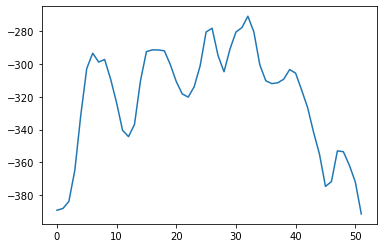

In [17]:
plt.plot(mfccs[0])

## Extracting mfccs for all files

In [18]:
import os
import numpy as np

In [19]:
# path of our dataset

dataset_path = 'Dataset/UrbanSound8K/audio'
metadata = pd.read_csv('Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [20]:
# function for feature extractor

def feature_extractor(file):
    audio_data, sr = librosa.load(file)
    
    mfccs_features = librosa.feature.mfcc(audio_data,sr= sr,n_mfcc = 50)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    return mfccs_scaled_features

In [21]:
# importing for keeping eye on progress
from tqdm import tqdm

extracted_features = []
# iterating through metadata for finding mfccs
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    class_label = row['class']
    feature_data = feature_extractor(file_name)
    extracted_features.append([feature_data,class_label])

3555it [14:23,  4.25it/s]C:\Users\hp\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [32:14,  7.17it/s]C:\Users\hp\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [33:35,  4.33it/s]


In [22]:
extracted_features

[[array([-209.93578   ,   63.42263   , -123.69025   ,  -60.0192    ,
          -14.457384  ,  -29.090641  ,   -4.251178  ,   12.419749  ,
           12.739302  ,    9.053966  ,   -6.808078  ,   -2.136559  ,
          -13.349953  ,    6.6780257 ,   -3.144794  ,   -3.6953928 ,
          -15.768194  ,   -0.38718578,   -3.2507935 ,    6.490812  ,
          -11.3526125 ,   -7.6883025 ,    5.416355  ,   -2.7029932 ,
           -6.2799807 ,    0.45257607,   -3.879339  ,    5.36969   ,
           -6.6641655 ,   -4.454918  ,    0.39725438,    8.100588  ,
           -1.0730537 ,    2.7207086 ,   -6.7139754 ,   -1.8797903 ,
            2.0122082 ,   -0.66254264,   -1.8982308 ,    1.3549527 ,
            0.24541698,    1.948786  ,   -4.9638777 ,   -4.2700353 ,
           -5.842389  ,    0.5195507 ,   -5.7528954 ,    1.4747163 ,
           -5.187261  ,    2.3625958 ], dtype=float32),
  'dog_bark'],
 [array([-4.17291046e+02,  1.00148506e+02, -4.38692551e+01,  5.19531136e+01,
          9.04440594e+00

In [23]:
# converting extracted features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-209.93578, 63.42263, -123.69025, -60.0192, -...",dog_bark
1,"[-417.29105, 100.148506, -43.869255, 51.953114...",children_playing
2,"[-452.77457, 113.24303, -38.501553, 44.0628, 7...",children_playing
3,"[-406.86542, 92.06992, -25.97457, 43.714268, 1...",children_playing
4,"[-440.05148, 104.7528, -43.601677, 51.623074, ...",children_playing


In [24]:
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(8732, 50)

In [26]:
#plt.plot(X[0])

In [27]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
#Y = np.array(pd.get_dummies(Y))
# applying label encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [29]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
Y.shape

(8732, 10)

In [31]:
# Splitting data into test and training dataset

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state =0)

In [32]:
X_train.shape

(6985, 50)

In [33]:
X_test.shape

(1747, 50)

In [34]:
Y_train.shape

(6985, 10)

In [35]:
Y_test.shape

(1747, 10)

In [36]:
X_train

array([[-124.80422   ,  104.07479   ,  -14.190011  , ...,    1.4724272 ,
          -4.3859177 ,   -3.514569  ],
       [  -5.5616617 ,   79.92436   ,    3.1772344 , ...,    1.2866564 ,
          -2.3234422 ,   -1.0519207 ],
       [ -40.82496   ,  -12.111292  ,   -8.240078  , ...,    1.6112318 ,
          -1.8078934 ,    0.48088816],
       ...,
       [-426.15594   ,   91.6996    ,    4.1893516 , ...,    1.0318367 ,
           3.988748  ,    3.548575  ],
       [-137.63344   ,  125.209015  ,  -22.548918  , ...,    0.55944735,
          -1.4123805 ,    0.7530893 ],
       [-418.62048   ,  207.39722   ,    6.8813004 , ...,   -2.1803138 ,
          -2.99754   ,   -0.58360726]], dtype=float32)

## Model Creation

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,Conv1D,MaxPooling1D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [39]:
# No. of classes
num_labels = Y.shape[1]

In [40]:
num_labels

10

In [41]:
model = Sequential()

# first layer
model.add(Dense(100,input_shape = (50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [43]:
model.compile(loss='categorical_crossentropy',metrics =['accuracy'],optimizer ='adam')

In [44]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 7EB9-CBD9

 Directory of C:\Users\hp\MLProjects

12/16/2021  04:18 PM    <DIR>          .
12/16/2021  04:18 PM    <DIR>          ..
12/01/2021  03:38 PM    <DIR>          .ipynb_checkpoints
12/01/2021  03:04 PM    <DIR>          Dataset
12/01/2021  03:37 PM         1,966,270 exploring_mfccs.ipynb
12/08/2021  08:12 PM    <DIR>          HTML UI
12/02/2021  07:14 PM    <DIR>          SavedModels
12/16/2021  04:18 PM           260,078 Sound_classification.ipynb
12/01/2021  03:40 PM               588 Untitled.ipynb
               3 File(s)      2,226,936 bytes
               6 Dir(s)  214,526,648,320 bytes free


In [45]:
# Training our model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epoch = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'SavedModels/audio_classification.hdf5',verbose=1,save_best_only=True)

start = datetime.now()
model.fit(X_train,Y_train,batch_size=num_batch_size,epochs=num_epoch,validation_data=(X_test,Y_test),callbacks=[checkpointer],verbose=1)

duration = datetime.now()-start
print("Training completed in time: ", duration)

Epoch 1/100
213/219 [============================>.] - ETA: 0s - loss: 13.1838 - accuracy: 0.1162
Epoch 00001: val_loss improved from inf to 2.29346, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 12.9414 - accuracy: 0.1157 - val_loss: 2.2935 - val_accuracy: 0.1162
Epoch 2/100
205/219 [===========================>..] - ETA: 0s - loss: 2.6401 - accuracy: 0.1218
Epoch 00002: val_loss improved from 2.29346 to 2.28150, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.6308 - accuracy: 0.1213 - val_loss: 2.2815 - val_accuracy: 0.1145
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 2.3604 - accuracy: 0.1165
Epoch 00003: val_loss improved from 2.28150 to 2.27408, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3601 - accuracy: 0.1165 - val_loss: 2.2741 - val_accur

197/219 [=========================>....] - ETA: 0s - loss: 1.5605 - accuracy: 0.4569
Epoch 00025: val_loss improved from 1.36321 to 1.35267, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.5556 - accuracy: 0.4593 - val_loss: 1.3527 - val_accuracy: 0.5655
Epoch 26/100
200/219 [==========================>...] - ETA: 0s - loss: 1.4977 - accuracy: 0.4867
Epoch 00026: val_loss improved from 1.35267 to 1.30171, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 1.4981 - accuracy: 0.4849 - val_loss: 1.3017 - val_accuracy: 0.5701
Epoch 27/100
196/219 [=========================>....] - ETA: 0s - loss: 1.4772 - accuracy: 0.4923
Epoch 00027: val_loss improved from 1.30171 to 1.27806, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4727 - accuracy: 0.4933 - val_loss: 1.2781 - val_accuracy: 0.5

Epoch 50/100
217/219 [============================>.] - ETA: 0s - loss: 1.0814 - accuracy: 0.6421
Epoch 00050: val_loss improved from 0.85121 to 0.84113, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 1.0836 - accuracy: 0.6411 - val_loss: 0.8411 - val_accuracy: 0.7378
Epoch 51/100
194/219 [=========================>....] - ETA: 0s - loss: 1.0390 - accuracy: 0.6608
Epoch 00051: val_loss did not improve from 0.84113
219/219 [==============================] - 1s 2ms/step - loss: 1.0428 - accuracy: 0.6604 - val_loss: 0.8671 - val_accuracy: 0.7252
Epoch 52/100
198/219 [==========================>...] - ETA: 0s - loss: 1.0273 - accuracy: 0.6564
Epoch 00052: val_loss improved from 0.84113 to 0.82335, saving model to SavedModels\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.0225 - accuracy: 0.6604 - val_loss: 0.8233 - val_accuracy: 0.7378
Epoch 53/100
193/219 [====================

Epoch 77/100
202/219 [==========================>...] - ETA: 0s - loss: 0.9258 - accuracy: 0.6966
Epoch 00077: val_loss did not improve from 0.72200
219/219 [==============================] - 0s 2ms/step - loss: 0.9247 - accuracy: 0.6955 - val_loss: 0.7341 - val_accuracy: 0.7756
Epoch 78/100
202/219 [==========================>...] - ETA: 0s - loss: 0.9230 - accuracy: 0.7013
Epoch 00078: val_loss did not improve from 0.72200
219/219 [==============================] - 0s 2ms/step - loss: 0.9268 - accuracy: 0.7001 - val_loss: 0.7363 - val_accuracy: 0.7676
Epoch 79/100
204/219 [==========================>...] - ETA: 0s - loss: 0.9342 - accuracy: 0.6950
Epoch 00079: val_loss did not improve from 0.72200
219/219 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.6949 - val_loss: 0.7392 - val_accuracy: 0.7653
Epoch 80/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8925 - accuracy: 0.7044
Epoch 00080: val_loss did not improve from 0.72200
219/219 [==

In [46]:
test_accuracy = model.evaluate(X_test,Y_test,verbose=0)
print('test Accuracy: ', test_accuracy[1])

test Accuracy:  0.7922152280807495


In [47]:
# testing a single audio file

test_file = 'Dataset/UrbanSound8K/audio/12647-3-2-0.wav'
test_features = feature_extractor(test_file)
test_features = test_features.reshape(1,-1)
#model.predict(test_features)
class_id = np.argmax(model.predict(test_features), axis=-1)
predicted_label = labelencoder.inverse_transform(class_id)

In [48]:
predicted_label

array(['dog_bark'], dtype='<U16')

In [49]:
test_features.shape

(1, 50)

#### finding label of class

In [50]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [51]:
metadata['classID'].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4], dtype=int64)

In [52]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [53]:
label_id = np.argmax(model.predict(test_features), axis=-1)

In [54]:
label_id = label_id[0]

In [55]:
classes = metadata['class'].unique()

In [56]:
metadata['classID']

0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: classID, Length: 8732, dtype: int64

## CNN Model

In [57]:
# Building CNN model
cnn_model = Sequential()
input_shape = (50,1)

#first conv2d layer
cnn_model.add(Conv1D(64,(3),activation='relu',input_shape=input_shape))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Conv1D(64,(3),activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=(2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(100,activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_labels,activation='softmax'))

In [58]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 64)            0         
                                                                 
 flatten (Flatten)           (None, 704)              

In [59]:
cnn_model.compile(loss='categorical_crossentropy',metrics =['accuracy'],optimizer ='adam')

In [60]:
# Training our cnn model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epoch = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'SavedModels/audio_classification_cnn.hdf5',verbose=1,save_best_only=True)

start = datetime.now()
history = cnn_model.fit(X_train,Y_train,batch_size=num_batch_size,epochs=num_epoch,validation_data=(X_test,Y_test),callbacks=[checkpointer],verbose=1)

duration = datetime.now()-start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 2.0384 - accuracy: 0.3278
Epoch 00001: val_loss improved from inf to 1.30864, saving model to SavedModels\audio_classification_cnn.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 2.0198 - accuracy: 0.3347 - val_loss: 1.3086 - val_accuracy: 0.5724
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 1.3974 - accuracy: 0.5156
Epoch 00002: val_loss improved from 1.30864 to 1.01792, saving model to SavedModels\audio_classification_cnn.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.3962 - accuracy: 0.5162 - val_loss: 1.0179 - val_accuracy: 0.6760
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 1.2091 - accuracy: 0.5857
Epoch 00003: val_loss improved from 1.01792 to 0.89860, saving model to SavedModels\audio_classification_cnn.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.2087 - accuracy: 0.5858 - val_loss: 0.8986 -

Epoch 27/100
210/219 [===========================>..] - ETA: 0s - loss: 0.4379 - accuracy: 0.8460
Epoch 00027: val_loss improved from 0.36276 to 0.35463, saving model to SavedModels\audio_classification_cnn.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.4408 - accuracy: 0.8461 - val_loss: 0.3546 - val_accuracy: 0.8952
Epoch 28/100
210/219 [===========================>..] - ETA: 0s - loss: 0.4149 - accuracy: 0.8536
Epoch 00028: val_loss did not improve from 0.35463
219/219 [==============================] - 1s 5ms/step - loss: 0.4165 - accuracy: 0.8523 - val_loss: 0.3644 - val_accuracy: 0.8918
Epoch 29/100
208/219 [===========================>..] - ETA: 0s - loss: 0.4237 - accuracy: 0.8540
Epoch 00029: val_loss improved from 0.35463 to 0.34980, saving model to SavedModels\audio_classification_cnn.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.8544 - val_loss: 0.3498 - val_accuracy: 0.8907
Epoch 30/100
212/219 [============

Epoch 55/100
212/219 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.8818
Epoch 00055: val_loss did not improve from 0.31339
219/219 [==============================] - 1s 5ms/step - loss: 0.3302 - accuracy: 0.8817 - val_loss: 0.3318 - val_accuracy: 0.8998
Epoch 56/100
211/219 [===========================>..] - ETA: 0s - loss: 0.3401 - accuracy: 0.8824
Epoch 00056: val_loss did not improve from 0.31339
219/219 [==============================] - 1s 5ms/step - loss: 0.3419 - accuracy: 0.8820 - val_loss: 0.3200 - val_accuracy: 0.9038
Epoch 57/100
212/219 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8855
Epoch 00057: val_loss did not improve from 0.31339
219/219 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8850 - val_loss: 0.3169 - val_accuracy: 0.9118
Epoch 58/100
210/219 [===========================>..] - ETA: 0s - loss: 0.3354 - accuracy: 0.8844
Epoch 00058: val_loss did not improve from 0.31339
219/219 [==

Epoch 84/100
211/219 [===========================>..] - ETA: 0s - loss: 0.2744 - accuracy: 0.9046
Epoch 00084: val_loss did not improve from 0.30700
219/219 [==============================] - 1s 5ms/step - loss: 0.2767 - accuracy: 0.9035 - val_loss: 0.3277 - val_accuracy: 0.9136
Epoch 85/100
208/219 [===========================>..] - ETA: 0s - loss: 0.2744 - accuracy: 0.9035
Epoch 00085: val_loss did not improve from 0.30700
219/219 [==============================] - 1s 5ms/step - loss: 0.2743 - accuracy: 0.9034 - val_loss: 0.3102 - val_accuracy: 0.9153
Epoch 86/100
211/219 [===========================>..] - ETA: 0s - loss: 0.2867 - accuracy: 0.9023
Epoch 00086: val_loss did not improve from 0.30700
219/219 [==============================] - 1s 5ms/step - loss: 0.2871 - accuracy: 0.9025 - val_loss: 0.3241 - val_accuracy: 0.9130
Epoch 87/100
209/219 [===========================>..] - ETA: 0s - loss: 0.2862 - accuracy: 0.9000
Epoch 00087: val_loss did not improve from 0.30700
219/219 [==

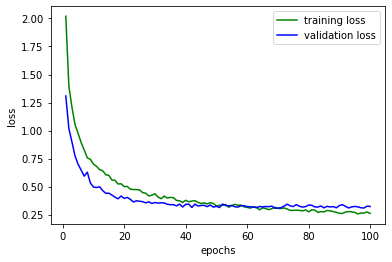

In [61]:
loss_training = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(range(1,101),loss_training,'g',label = 'training loss')
plt.plot(range(1,101),loss_val,'b',label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

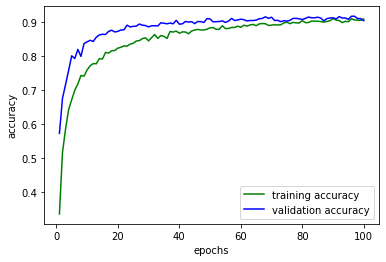

In [62]:
loss_training = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(range(1,101),loss_training,'g',label = 'training accuracy')
plt.plot(range(1,101),loss_val,'b',label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [63]:
test_accuracy_cnn = cnn_model.evaluate(X_test,Y_test,verbose=0)
print('test Accuracy using CNN model: ', test_accuracy_cnn[1])

test Accuracy using CNN model:  0.904979944229126


In [64]:
# testing a single audio file

test_file = 'Dataset/UrbanSound8K/audio/Tests/shotgun-firing-4-6746.wav'
test_features = feature_extractor(test_file)
test_features = test_features.reshape(1,-1)
#model.predict(test_features)
class_id = np.argmax(model.predict(test_features), axis=-1)
predicted_label = labelencoder.inverse_transform(class_id)
print(predicted_label)

['engine_idling']
